## Introduction to Machine Learning  

## Assignment 7: Assessment and Measurements

You can't learn technical subjects without hands-on practice. The assignments are an important part of the course. To submit this assignment you will need to make sure that you save your Jupyter notebook. 

Below are the links of 2 videos that explain:

1. [How to save your Jupyter notebook](https://youtu.be/0aoLgBoAUSA) and,       
2. [How to answer a question in a Jupyter notebook assignment](https://youtu.be/7j0WKhI3W4s).

### Assignment Learning Goals:

By the end of the module, students are expected to:

- Explain why accuracy is not always the best metric in ML.
- Explain components of a confusion matrix.
- Define precision, recall, and f1-score and use them to evaluate different classifiers.
- Identify whether there is class imbalance and whether you need to deal with it.
- Explain `class_weight` and use it to deal with data imbalance.
- Appropriately select a scoring metric given a regression problem.
- Interpret and communicate the meanings of different scoring metrics on regression problems. MSE, RMSE, $R^2$, MAPE.
- Apply different scoring functions with `cross_validate` and `GridSearchCV` and `RandomizedSearchCV`.


This assignment covers [Module 7](https://ml-learn.mds.ubc.ca/en/module7) of the online course. You should complete this module before attempting this assignment.

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `None` with your completed code and answers then proceed to run the cell!

Note that some of the questions in this assignment will have hidden tests. This means that no feedback will be given as to the correctness of your solution. It will be left up to you to decide if your answer is sufficiently correct. These questions are worth 2 points.

In [1]:
# Import libraries needed for this lab
from hashlib import sha1

import altair as alt
import graphviz
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.metrics import make_scorer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.svm import SVC, SVR
from sklearn import set_config

import test_assignment7 as t
#alt.renderers.enable('mimetype')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
# Display Diagrams of Pipelines
set_config(display = 'diagram')

# 1. Precision, recall, and f1 score "by hand" (without `sklearn`)


Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

##### Model A
|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


##### Model B
|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

**Question 1.1** <br> {points: 1}  

Precision, recall, and f1 score depend crucially upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class?

Save the label name in a string object named `answer_1_1`.

In [3]:
answer_1_1 = 'Actual disease'

In [4]:
t.test_1_1(answer_1_1)

'Success'

**Question 1.2** <br> {points: 3}  

Calculate accuracies for Model A and Model B. 

Save the values of each calculations as a fraction in objects name `model_a_acc` and `model_b_acc` respectively. 

In [5]:
TP_a, FN_a, FP_a, TN_a = 2, 8, 0, 100 

model_a_acc = (TP_a + TN_a) / (TP_a + FP_a + TN_a + FN_a) 

print(f'The accuracy of model A is {model_a_acc}.')

The accuracy of model A is 0.9272727272727272.


In [6]:
TP_b, FN_b, FP_b, TN_b = 6, 4, 10, 90

model_b_acc = (TP_b + TN_b) / (TP_b + FP_b + TN_b + FN_b)

print(f'The accuracy of model B is {model_b_acc}.')

The accuracy of model B is 0.8727272727272727.


In [7]:
t.test_1_2_1(model_a_acc)

'Success'

In [8]:
# check that the variable exists
assert 'model_b_acc' in globals(
), "Please make sure that your solution is named 'model_b_acc'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 1.3** <br> {points: 1}  

Which model would you pick simply based on the accuracy metric? 

Save either "Model A" or "Model B" in an object named `answer_1_3`.

In [9]:
answer_1_3 = 'Model A'

In [10]:
t.test_1_3(answer_1_3)

'Success'

**Question 1.4** <br> {points: 3}  

Calculate precision, recall, f1-score for **Model A** by designating the appropriate fraction to objects named `a_precision`, `a_recall` and `a_f1`. 

You can use the objects `a_precision` and `a_recall` to use in your `a_f1` calculation.

In [11]:
a_precision = TP_a / (TP_a + FP_a) 
a_recall = TP_a / (TP_a + FN_a)
a_f1 = 2 * (a_precision * a_recall) / (a_precision + a_recall)    

print(f'The precision of model A is {a_precision :.2f}.')
print(f'The recall of model A is {a_recall :.2f}.')
print(f'The F1 score of model A is {a_f1 :.2f}.')

The precision of model A is 1.00.
The recall of model A is 0.20.
The F1 score of model A is 0.33.


In [12]:
t.test_1_4_1(a_precision)

'Success'

In [13]:
t.test_1_4_2(a_recall)

'Success'

In [14]:
t.test_1_4_3(a_f1)

'Success'

**Question 1.5** <br> {points: 3}  

Calculate precision, recall, f1-score for **Model B** by designating the appropriate fraction to objects named `b_precision`, `b_recall` and `b_f1`. 

You can use the objects `b_precision` and `b_recall` to use in your `b_f1` calculation.

In [15]:
b_precision = TP_b / (TP_b + FP_b)
b_recall = TP_b / (TP_b + FN_b)
b_f1 = 2 * (b_precision * b_recall) / (b_precision + b_recall)

print(f'The precision of model B is {b_precision :.2f}.')
print(f'The recall of model B is {b_recall :.2f}.')
print(f'The F1 score of model B is {b_f1 :.2f}.')

The precision of model B is 0.38.
The recall of model B is 0.60.
The F1 score of model B is 0.46.


In [16]:
t.test_1_5_1(b_precision)

'Success'

In [17]:
t.test_1_5_2(b_recall)

'Success'

In [18]:
t.test_1_5_3(b_f1)

'Success'

**Question 1.6** <br> {points: 1}  

Which metric is more informative in this case?

i) Accuracy

ii) Precision

iii) Recall

iv) f1



Select all that apply and add them into a list named `answer_1_6`. 
For example if statement i and iv are both true, your solution will look like this: 

```
answer_1_6 = ["i", "iv"] 
```


In [19]:
answer_1_6 = ['iii', 'iv']

In [20]:
t.test_1_6(answer_1_6)

'Success'

**Question 1.7** <br> {points: 1}  

Which model would you pick based on this information? 

Save either "Model A" or "Model B" in an object named `answer_1_7`.

In [21]:
answer_1_7 = 'Model B'

In [22]:
t.test_1_7(answer_1_7)

'Success'

# 2. Classification evaluation metrics using `sklearn`

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In the module material, we looked at a credit card fraud dataset which is a classic example of an imbalanced dataset. Another example is customer churn datasets. For the next questions, you will be using a [bank customer churn dataset](https://www.kaggle.com/shubh0799/churn-modelling) from Kaggle. In this question, we will be concentrating on the target label `Exited`. 

In [23]:
churn_df = pd.read_csv("data/churn.csv")
train_df, test_df = train_test_split(churn_df, test_size=0.3, random_state=123)
display(train_df.head())

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3144,15638003,648,Spain,Male,55,1,81370.07,1,0,1,181534.04,0
9939,15808971,693,Spain,Female,57,9,0.00,2,1,1,135502.77,0
7925,15800482,586,Spain,Female,33,7,0.00,2,1,1,168261.40,0
309,15746726,438,Germany,Male,31,8,78398.69,1,1,0,44937.01,0
9415,15750407,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


**Question 2.1** <br> {points: 1}  

What is the distribution of target values (`Exited`) in the train split? Your answer should be of type Pandas Series and saved in an object named `class_dist`.

In [24]:
class_dist = train_df['Exited'].value_counts()
display(class_dist)


0    5568
1    1432
Name: Exited, dtype: int64

In [25]:
t.test_2_1(class_dist)

'Success'

**Question 2.2** <br> {points: 1}  

Let's now separate our feature vectors from the target.

Use all the columns except for `Exited` as your `X` and the `Exited` column as your target `y`. 

You will need to split both `train_df` and `test_df`. 

Save the results in objects named `X_train`, `y_train`, `X_test` and `y_test`. 

In [26]:
X_train = train_df.drop('Exited', axis = 1)
y_train = train_df['Exited']

X_test = test_df.drop('Exited', axis = 1)
y_test = test_df['Exited']

display(X_train.head())

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,15638003,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,15808971,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,15800482,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,15746726,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,15750407,768,Germany,Female,43,2,129264.05,2,0,0,19150.14


In [27]:
t.test_2_2(X_train, X_test, y_train, y_test)

'Success'

**Question 2.3** <br> {points: 1} 

Carry out cross-validation with `DummyClassifier` using the `stratified` strategy. Pass the following `scoring` metrics to `cross_validate`. 
- accuracy
- f1
- recall
- precision

Make sure you use  `return_train_score=True` and 5-fold cross-validation.

Save your results in a dataframe named `dummy_scores`. 

In [28]:
dummy_scores = pd.DataFrame(
    cross_validate(
        estimator = DummyClassifier(strategy = 'stratified'), 
        X = X_train, y = y_train, 
        cv = 5, return_train_score = True,
        scoring = ['accuracy', 'precision', 'recall', 'f1']
    )
)

display(dummy_scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.007986,0.023738,0.666429,0.675893,0.186851,0.208877,0.188811,0.209424,0.187826,0.209150
1,0.005346,0.018665,0.663571,0.671786,0.198697,0.200173,0.213287,0.201571,0.205734,0.200870
2,0.004205,0.016011,0.659286,0.674286,0.182724,0.208763,0.192308,0.212042,0.187394,0.210390
3,0.003004,0.016041,0.662857,0.667857,0.190635,0.200837,0.198606,0.209607,0.194539,0.205128
4,0.004999,0.020768,0.678571,0.676429,0.227425,0.201966,0.236934,0.197380,0.232082,0.199647


In [29]:
t.test_2_3(dummy_scores)

'Success'

**Question 2.4** <br> {points: 1} 

What is the mean of each column in `dummy_scores`?


Save your result in an object named `dummy_mean`. 

In [30]:
dummy_mean = dummy_scores.mean()

display(dummy_mean)

fit_time           0.005108
score_time         0.019045
test_accuracy      0.666143
train_accuracy     0.673250
test_precision     0.197267
train_precision    0.204123
test_recall        0.205989
train_recall       0.206005
test_f1            0.201515
train_f1           0.205037
dtype: float64

In [31]:
t.test_2_4(dummy_mean)

'Success'

**Question 2.5** <br> {points: 5}  

Using either `.describe(include="all")`, `.info()` or looking at the data, split it into 4 types of features; numeric, categorical, binary and `drop_features`. 

- Add the labels of the numeric column(s) (as type string) to a list name `numeric_features`.
- Add the labels of the categorical column(s) (as type string) to a list name `categorical_features`.
- Add the labels of the binary column(s) (as type string) to a list name `binary_features`.
- Add the labels of the column that should be excluded from the model fitting to a list named `drop_features`. _(Hint: which of the columns is a unique identifier for the examples?)_

Identify different feature types (e.g., numeric, categorical, binary, drop features).
train_df.info()

In [32]:
display(X_train.describe(include = 'all'))

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7.000000e+03,7000.000000,7000,7000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3512,3833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569106e+07,650.144571,NaN,NaN,38.942571,5.020143,76448.489407,1.534429,0.705429,0.515286,99934.226306
std,7.176223e+04,96.554892,NaN,NaN,10.612389,2.894639,62700.899244,0.582855,0.455882,0.499802,57555.469387
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1.562887e+07,583.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50743.832500
50%,1.569096e+07,652.000000,NaN,NaN,37.000000,5.000000,96889.925000,1.000000,1.000000,1.000000,99729.890000
75%,1.575365e+07,717.000000,NaN,NaN,44.000000,8.000000,127838.535000,2.000000,1.000000,1.000000,149458.040000


In [33]:
display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 3144 to 3582
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       7000 non-null   int64  
 1   CreditScore      7000 non-null   int64  
 2   Geography        7000 non-null   object 
 3   Gender           7000 non-null   object 
 4   Age              7000 non-null   int64  
 5   Tenure           7000 non-null   int64  
 6   Balance          7000 non-null   float64
 7   NumOfProducts    7000 non-null   int64  
 8   HasCrCard        7000 non-null   int64  
 9   IsActiveMember   7000 non-null   int64  
 10  EstimatedSalary  7000 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 656.2+ KB


None

In [34]:
display(X_train.head())

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,15638003,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,15808971,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,15800482,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,15746726,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,15750407,768,Germany,Female,43,2,129264.05,2,0,0,19150.14


In [35]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_features = ['Geography']  
drop_features = ['CustomerId']
binary_features = ['Gender']

In [36]:
t.test_2_5_1(numeric_features)

'Success'

In [37]:
# check that the variable exists
assert 'categorical_features' in globals(
), "Please make sure that your solution is named 'categorical_features'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

In [38]:
t.test_2_5_3(drop_features)

'Success'

In [39]:
t.test_2_5_4(binary_features)

'Success'

Since we have no null values we can skip the individual pipelines and make our column transforming with just a single transformation. 

Because everyone needs a little help once in a while, we are going to do this part for you! 

In [40]:
# We don't need to perform imputation on each feature type.

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown = "ignore"), categorical_features),
    (OneHotEncoder(handle_unknown = "error", drop = "if_binary"), binary_features)
)

**Question 2.6** <br> {points: 2}  

In this question, you will be using the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) which you haven't studied yet but did see in assignment 3.  You should feel comfortable using models with our usual ML workflow even if you haven't seen them before. 


Build a pipeline named `unbalanced_pipe` that first preprocesses `preprocessor` and then builds a  `RandomForestClassifier` using a random_state of 77. 

Carry out cross-validation on `unbalanced_pipe` and the training set using the `cross_validate` function and the following evaluation metrics:
- `accuracy`
- `precision`
- `recall`
- `f1`

Note that you can pass multiple [scoring metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) as a list or a dict to the `scoring` parameter. 

Save the results of the cross-validation in a dataframe named`rf_unbalanced_scores`.

In [41]:
unbalanced_pipe = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state = 77)
)


rf_unbalanced_scores = pd.DataFrame(
    cross_validate(
        estimator = unbalanced_pipe,
        X = X_train, y = y_train,
        cv = 5, return_train_score = True,
        scoring = ['accuracy', 'precision', 'recall', 'f1']
    )
)

display(rf_unbalanced_scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.930581,0.187446,0.858571,1.0,0.744444,1.0,0.468531,1.0,0.575107,1.0
1,2.702435,0.247491,0.842143,1.0,0.721088,1.0,0.370629,1.0,0.489607,1.0
2,3.093207,0.242700,0.868571,1.0,0.810976,1.0,0.465035,1.0,0.591111,1.0
3,4.091995,0.234395,0.843571,1.0,0.680851,1.0,0.445993,1.0,0.538947,1.0
4,4.955261,0.299654,0.872857,1.0,0.834356,1.0,0.473868,1.0,0.604444,1.0


In [42]:
t.test_2_6(rf_unbalanced_scores)

'Success'

**Question 2.7** <br> {points: 1} 

What is the mean of each column in `rf_unbalanced_scores`?


Save your result in an object named `rf_unbalanced_mean`. 

In [43]:
rf_unbalanced_mean = rf_unbalanced_scores.mean()

display(rf_unbalanced_mean)

fit_time           3.554696
score_time         0.242337
test_accuracy      0.857143
train_accuracy     1.000000
test_precision     0.758343
train_precision    1.000000
test_recall        0.444811
train_recall       1.000000
test_f1            0.559844
train_f1           1.000000
dtype: float64

In [44]:
t.test_2_7(rf_unbalanced_mean)

'Success'

**Question 2.8** <br> {points: 2}  

Repeat question 6 above but this time set `class_weight="balanced"` in the `RandomForestClassifier`. 
Save the new pipeline in an object named `balanced_pipe`. Don't forget to use `random_state=77`for the classifier. 

Carry out cross-validation on `balanced_pipe` but this time save the scores in a dataframe named `rf_balanced_scores`.

In [45]:
balanced_pipe = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state = 77, class_weight = 'balanced')
)

rf_balanced_scores = pd.DataFrame(
    cross_validate(
        estimator = balanced_pipe,
        X = X_train, y = y_train,
        cv = 5, return_train_score = True,
        scoring = ['accuracy', 'precision', 'recall', 'f1']
    )
)

display(rf_balanced_scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,3.933444,0.296894,0.856429,1.0,0.751479,1.0,0.444056,1.0,0.558242,1.0
1,3.635341,0.244916,0.839286,1.0,0.729323,1.0,0.339161,1.0,0.463007,1.0
2,3.823553,0.247167,0.868571,1.0,0.840000,1.0,0.440559,1.0,0.577982,1.0
3,3.688452,0.271237,0.847143,1.0,0.706215,1.0,0.435540,1.0,0.538793,1.0
4,3.197311,0.209775,0.862857,1.0,0.806452,1.0,0.435540,1.0,0.565611,1.0


In [46]:
t.test_2_8(rf_balanced_scores)

'Success'

**Question 2.9** <br> {points: 1} 

What is the mean of each column in `rf_balanced_scores`?


Save your result in an object named `rf_balanced_mean`. 

In [47]:
rf_balanced_mean = rf_balanced_scores.mean()

display(rf_balanced_mean)

fit_time           3.655620
score_time         0.253998
test_accuracy      0.854857
train_accuracy     1.000000
test_precision     0.766694
train_precision    1.000000
test_recall        0.418971
train_recall       1.000000
test_f1            0.540727
train_f1           1.000000
dtype: float64

In [48]:
t.test_2_9(rf_balanced_mean)

'Success'

**Question 2.10** <br> {points: 1} 

Look at your results above. Which of the following statements are true? 

i) Both random forest models have better mean validation accuracy performance than the dummy classifier.

ii) The balanced class random forest model has a better mean validation recall score than the unbalanced random forest model. 

iii) The balanced class random forest model has a better mean validation precision score than the unbalanced random forest model.  

iv) Mean validation precision and recall scores only increased in the balanced class random forest model.

v) Both random forest models show higher validation precision scores than validation recall scores. 


Select all that apply and add them into a list named `answer_2_10`. 
For example if statement i and iv are both true, your solution will look like this: 

```
answer_2_10 = ["i", "iv"] 
```


In [49]:
answer_2_10 = ['i', 'iii', 'v'] 

In [50]:
t.test_2_10(answer_2_10)

'Success'

**Question 2.11** <br> {points: 1} 

For this next question, we have given you the majority of the code to hyperparameter tune the balanced `RandomForestClassifier`. 

Copy and paste the contents of the cell below into the following cell where the solution should be. Fill in the `....` blanks below so that it executes and returns the output. 

In [51]:
import scipy
from scipy.stats import randint

In [52]:
'''
rf_pipeline = make_pipeline(
    preprocessor, ....(class_weight=...., random_state=123)
)

param_dist = {
    "randomforestclassifier__n_estimators": scipy.stats.randint(low=10, high=300),
    "randomforestclassifier__max_depth": scipy.stats.randint(low=2, high=20),
}

random_search = ....(
    ....,
    ....,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    ....="f1",
    random_state=123,
)
random_search.....(X_train, y_train)
'''

'\nrf_pipeline = make_pipeline(\n    preprocessor, ....(class_weight=...., random_state=123)\n)\n\nparam_dist = {\n    "randomforestclassifier__n_estimators": scipy.stats.randint(low=10, high=300),\n    "randomforestclassifier__max_depth": scipy.stats.randint(low=2, high=20),\n}\n\nrandom_search = ....(\n    ....,\n    ....,\n    n_iter=50,\n    cv=3,\n    verbose=1,\n    n_jobs=-1,\n    ....="f1",\n    random_state=123,\n)\nrandom_search.....(X_train, y_train)\n'

In [53]:
rf_pipeline = make_pipeline(
    preprocessor, RandomForestClassifier(class_weight = 'balanced', random_state = 123)
)

param_dist = {
    "randomforestclassifier__n_estimators": scipy.stats.randint(low = 10, high = 300),
    "randomforestclassifier__max_depth": scipy.stats.randint(low = 2, high = 20),
}

random_search = RandomizedSearchCV(
    estimator = rf_pipeline,
    param_distributions = param_dist,
    n_iter = 50, cv = 3,
    verbose = 1,
    n_jobs = -1,
    scoring = 'f1',
    random_state = 123,
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['CustomerId']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'NumOfProducts',
                                                                                'HasCrCard',
                                                                                'IsActiveMember',
                                                                                'EstimatedSalary']),
                                                                              ('onehotencoder-1',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Geography']),
                                                                              ('o...
                                              RandomForestClassifier(class_weight='balanced',
                                                                     random_state=123))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E551EF3280>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E551EF3A30>},
                   random_state=123, scoring='f1', verbose=1)

In [54]:
t.test_2_11(rf_pipeline, random_search)

'Success'

**Question 2.12** <br> {points: 3}

What are the best hyperparameter value for `n_estimators` and `max_depth`. Save it in an object named `optimal_parameters` (The auto-grader is expecting a dictionary object). 

What was the corresponding validation score? Save this in an object named `optimal_score`. 

*Hint: `.best_params_`  and `.best_score_` are helpful here.* 


In [55]:
optimal_parameters = random_search.best_params_
optimal_score = random_search.best_score_

print(f'The optimal parameters are: {optimal_parameters}')
print(f'The optimal score is: {optimal_score}')

The optimal parameters are: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 266}
The optimal score is: 0.6008852888381612


In [56]:
t. test_2_12_1(random_search, optimal_parameters)

'Success'

In [57]:
# check that the variable exists
assert 'optimal_score' in globals(
), "Please make sure that your solution is named 'optimal_score'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 2.13** <br> {points: 2} 

What is the train and test score of the best scoring model? Save the result in objects named `training_score`, and `testing_score` respectively.

In [58]:
training_score = random_search.score(X_train, y_train)

print(f'The training score is: {training_score}')

The training score is: 0.7914191419141915


In [59]:
testing_score = random_search.score(X_test, y_test)

print(f'The testing score is: {testing_score}')

The testing score is: 0.6501597444089456


In [60]:
t.test_2_13_1(random_search, training_score, X_train, y_train)

'Success'

In [61]:
t.test_2_13_2(random_search, testing_score, X_test, y_test)

'Success'

**Question 2.14** <br> {points: 0} 

Import the appropriate libraries to plot a confusion matrix and print a classification report. 

In [62]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [63]:
t.test_2_14()

'Success'

**Question 2.15** <br> {points: 1} 


Plot a confusion matrix on the test set using the object `random_search` as your estimator and "normalize" all your results (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) for more help here).

Name the plot `cm_plot`. 

In [64]:
random_search.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

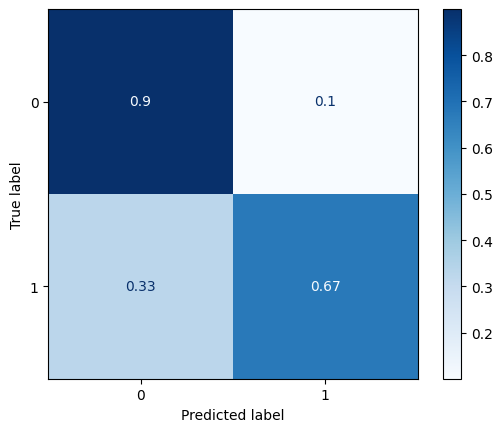

In [65]:
cm_plot = ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(
        y_true = y_test, y_pred = random_search.predict(X_test),
        normalize = 'true'
    )
)

cm_plot.plot(cmap = 'Blues')

In [66]:
t.test_2_15(cm_plot)

'Success'

**Question 2.16** <br> {points: 3} 

Below print a classification report on the `X_test` predictions of `random_search`'s best model. Use this information to answer the questions below.

In [67]:
report = classification_report(
    y_true = y_test,
    y_pred = random_search.predict(X_test),
    target_names = ['Churn' if x == 1 else 'No Churn' for x in random_search.classes_]
)

print(report)

              precision    recall  f1-score   support

    No Churn       0.92      0.90      0.91      2395
       Churn       0.63      0.67      0.65       605

    accuracy                           0.85      3000
   macro avg       0.77      0.79      0.78      3000
weighted avg       0.86      0.85      0.86      3000



In [68]:
matrix_test = confusion_matrix(
    y_true = y_test,
    y_pred = random_search.predict(X_test),
    labels = random_search.classes_
)

display(matrix_test)

array([[2155,  240],
       [ 198,  407]], dtype=int64)



A) What is the recall considering that `Exited`(=1) is our "positive" class? Save the result to two decimal places in an object named `answer2_16a`. 

B) What is the precision weighted average? Save the result to two decimal places in an object named `answer2_16b`. 

C) How many customers exited in this test set? Save the result as an integer in an object named `answer2_16c`.

In [69]:
TN_test, FP_test = matrix_test[0, 0], matrix_test[0, 1]
TP_test, FN_test = matrix_test[1, 1], matrix_test[1, 0]

In [70]:
answer2_16a = round(TP_test / (TP_test + FN_test), 2)
answer2_16b = round(TP_test / (TP_test + FP_test), 2)
answer2_16c = TP_test + FN_test

print(f'The recall is: {answer2_16a}.')
print(f'The precision is: {answer2_16b}.')
print(f'The accuracy is: {answer2_16c}.')

The recall is: 0.67.
The precision is: 0.63.
The accuracy is: 605.


In [71]:
t.test_2_16_1(answer2_16a)

'Success'

In [72]:
t.test_2_16_2(answer2_16b)

'Success'

In [73]:
t.test_2_16_3(answer2_16c)

'Success'

**Question 2.17** <br> {points: 1} 

What's happened to our model since we have tuned our hyperparameters?

A) We have sacrificed some of our precision score for a better recall score.

B) Our accuracy has decreased.

C) We have likely increased the number of falsely identified exited customers.

D) All of the above.

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer2_17`.*

In [74]:
display(rf_balanced_mean)

fit_time           3.655620
score_time         0.253998
test_accuracy      0.854857
train_accuracy     1.000000
test_precision     0.766694
train_precision    1.000000
test_recall        0.418971
train_recall       1.000000
test_f1            0.540727
train_f1           1.000000
dtype: float64

In [75]:
optimal_df = pd.DataFrame(random_search.cv_results_)
optimal_df = optimal_df.query(f'param_randomforestclassifier__n_estimators == {optimal_parameters["randomforestclassifier__n_estimators"]}')
optimal_df = optimal_df.query(f'param_randomforestclassifier__max_depth == {optimal_parameters["randomforestclassifier__max_depth"]}')

optimal_df = optimal_df.mean()
display(optimal_df)

C:\Users\Muntakim\AppData\Local\Temp\ipykernel_2112\3049188844.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  optimal_df = optimal_df.mean()


mean_fit_time                                  11.616992
std_fit_time                                    0.705298
mean_score_time                                 0.829465
std_score_time                                  0.097071
param_randomforestclassifier__max_depth        10.000000
param_randomforestclassifier__n_estimators    266.000000
split0_test_score                               0.574236
split1_test_score                               0.603939
split2_test_score                               0.624481
mean_test_score                                 0.600885
std_test_score                                  0.020626
rank_test_score                                 1.000000
dtype: float64

In [76]:
matrix_train = confusion_matrix(
    y_true = y_train,
    y_pred = random_search.predict(X_train),
    labels = random_search.classes_
)

display(matrix_train)

array([[5169,  399],
       [ 233, 1199]], dtype=int64)

In [77]:
TN_train, FP_train = matrix_train[0, 0], matrix_train[0, 1]
TP_train, FN_train = matrix_train[1, 1], matrix_train[1, 0]

In [78]:
optimal_mean = pd.Series(index = rf_balanced_mean.index)

optimal_mean['fit_time'] = optimal_df['mean_fit_time']
optimal_mean['score_time'] = optimal_df['mean_score_time']

optimal_mean['test_accuracy'] = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
optimal_mean['train_accuracy'] = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)

optimal_mean['test_precision'] = TP_test / (TP_test + FP_test)
optimal_mean['train_precision'] = TP_train / (TP_train + FP_train)

optimal_mean['test_recall'] = TP_test / (TP_test + FN_test)
optimal_mean['train_recall'] = TP_train / (TP_train + FN_train)

optimal_mean['test_f1'] = 2 * (optimal_mean['test_precision'] * optimal_mean['test_recall']) / (optimal_mean['test_precision'] + optimal_mean['test_recall'])
optimal_mean['train_f1'] = 2 * (optimal_mean['train_precision'] * optimal_mean['train_recall']) / (optimal_mean['train_precision'] + optimal_mean['train_recall'])

display(optimal_mean)

C:\Users\Muntakim\AppData\Local\Temp\ipykernel_2112\2558217939.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  optimal_mean = pd.Series(index = rf_balanced_mean.index)


fit_time           11.616992
score_time          0.829465
test_accuracy       0.854000
train_accuracy      0.909714
test_precision      0.629057
train_precision     0.750313
test_recall         0.672727
train_recall        0.837291
test_f1             0.650160
train_f1            0.791419
dtype: float64

In [79]:
answer2_17 = 'D'

In [80]:
t.test_2_17(answer2_17)

'Success'

# 3. Regression Metrics

For this exercise, we will bring back the [Taiwan real estate valuation dataset](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) that we saw in assignment 1. 

We are doing the first part for you. 

In [81]:
housing_df = pd.read_csv('data/real_estate.csv')
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)
display(train_df.head())

,house_age,distance_station,num_stores,latitude,longitude,price
82,13.2,150.9347,7,24.96725,121.54252,48.1
307,10.3,3079.8900,0,24.95460,121.56627,24.7
267,34.7,482.7581,5,24.97433,121.53863,41.1
310,16.4,1643.4990,2,24.95394,121.55174,24.7
203,15.6,289.3248,5,24.98203,121.54348,46.1


In [82]:
X_train = train_df.drop(columns = ['price'])
y_train = train_df['price']

X_test = test_df.drop(columns = ['price'])
y_test = test_df['price']

**Question 3.1** <br> {points: 1}  

Since we have seen this dataset already, we know there are only numeric features and no missing values so we can skip quite a few steps here. 

Make a single pipeline using `make_pipeline` named `reg_pipe` that first uses `StandardScaler()`.


In [83]:
reg_pipe = make_pipeline(StandardScaler(), SVR())

In [84]:
t.test_3_1(reg_pipe)

'Success'

**Question 3.2** <br> {points: 1}  

Given the MAPE function we have given below, create a scorer function that we can pass into cross-validation. (look [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html?highlight=make_scorer#sklearn.metrics.make_scorer) for help). 

Save it in an object named `mape_scorer`. Remember that MAPE is an error measure so we must use `greater_is_better=False` as an argument. 


In [85]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))

In [86]:
mape_scorer = make_scorer(mape, greater_is_better = False)

display(mape_scorer)

make_scorer(mape, greater_is_better=False)

In [87]:
t.test_3_2(mape_scorer)

'Success'

**Question 3.3** <br> {points: 1}  

Make a dictionary named `scoring_dict` consisting the following metrics: 

- `neg_mean_squared_error`
- `neg_root_mean_square_error`
- `neg_mean_absolute_error`
- `r2`
- `mape_scorer`

The key-value pairs in this dictionary should be identical. (Aka the item to the left of the colon is the same as the right side of the colon - we have started it for you just in case.)

Remember that `mape_scorer` is a variable and should **NOT** be called as a string. (Although we need to name it as a string value for the dictionary's key; See slide 6 of exercise 21 for help.)

In [88]:
scoring_dict = {
    'neg_mean_squared_error' : 'neg_mean_squared_error',
    'neg_root_mean_square_error' : 'neg_root_mean_squared_error',
    'neg_mean_absolute_error' : 'neg_mean_absolute_error',
    'r2' : 'r2',
    'mape_scorer' : mape_scorer
}

In [89]:
t.test_3_3(scoring_dict)

'Success'

**Question 3.4** <br> {points: 1}  

Carry out cross-validation on `reg_pipe` and the training set using the `cross_validate` function.

Make sure to set `return_train_score=True` and assign our `scoring_dict` to the `scoring` argument.


Save the results of the cross-validation in a dataframe named `regression_scores`.

In [90]:
regression_scores = pd.DataFrame(
    cross_validate(
        estimator = reg_pipe,
        X = X_train, y = y_train,
        cv = 5, scoring = scoring_dict,
        return_train_score = True
    )
)

display(regression_scores)

,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_square_error,train_neg_root_mean_square_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_mape_scorer,train_mape_scorer
0,0.022985,0.014000,-51.770992,-89.378376,-7.195206,-9.454014,-5.143214,-5.893161,0.642393,0.544464,-12.531763,-17.800519
1,0.017991,0.011005,-67.990528,-84.527725,-8.245637,-9.193896,-5.969532,-5.723566,0.660132,0.536472,-20.185804,-16.637512
2,0.015963,0.010035,-37.858863,-90.483537,-6.152956,-9.512283,-4.899578,-5.868916,0.692046,0.551250,-13.713411,-17.498790
3,0.015994,0.010005,-63.846806,-81.002011,-7.990420,-9.000112,-5.532826,-5.658821,0.612303,0.574322,-17.381394,-17.090115
4,0.014954,0.010998,-197.275789,-53.292369,-14.045490,-7.300162,-8.115725,-5.157088,0.325115,0.664975,-24.880064,-14.847449


In [91]:
t.test_3_4(regression_scores)

'Success'

**Question 3.5** <br> {points: 1} 

What is the mean of each column in `regression_scores`?


Save your result in an object named `regression_mean`. 

In [92]:
regression_mean = regression_scores.mean()

display(regression_mean)

fit_time                             0.017578
score_time                           0.011209
test_neg_mean_squared_error        -83.748596
train_neg_mean_squared_error       -79.736804
test_neg_root_mean_square_error     -8.725942
train_neg_root_mean_square_error    -8.892093
test_neg_mean_absolute_error        -5.932175
train_neg_mean_absolute_error       -5.660310
test_r2                              0.586398
train_r2                             0.574297
test_mape_scorer                   -17.738487
train_mape_scorer                  -16.774877
dtype: float64

In [93]:
t.test_3_5(regression_mean)

'Success'

**Question 3.6** <br> {points: 2} 

What is the model's mean validation MAPE score? 

Save your answer to 2 decimal places in an object named `mean_reg_mape`. 

In [94]:
mean_reg_mape = round(regression_mean['test_mape_scorer'], 2)

display(mean_reg_mape)

-17.74

In [95]:
# check that the variable exists
assert 'mean_reg_mape' in globals(
), "Please make sure that your solution is named 'mean_reg_mape'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

## Attributions
- The Bank Customer Churn DataSet - [Kaggle](https://www.kaggle.com/shubh0799/churn-modelling)

- Real Estate Dataset - [The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

*Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*


- MDS DSCI 573 - Feature & Model Selection  - [MDS's GitHub website](https://github.com/UBC-MDS/DSCI_573_feat-model-select) 


## Before Submitting 

Before submitting your assignment please do the following:

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"

This is a simple way to make sure that you are submitting all the variables needed to mark the assignment. This method should help avoid losing marks due to changes in your environment.  